In [1]:
import os
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt

from utils import load_wav_16k_mono

2023-02-28 19:48:18.893540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
capuchin_file = '../data/Parsed_Capuchinbird_Clips/XC3776-3.wav'
not_capuchin_file = '../data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

wav = load_wav_16k_mono(capuchin_file)
nwav = load_wav_16k_mono(not_capuchin_file)


2023-02-28 19:48:46.534192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 19:48:46.616741: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


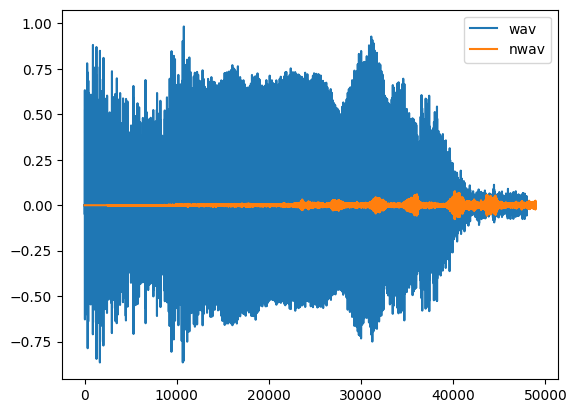

In [6]:
plt.plot(wav)
plt.plot(nwav)
plt.legend(['wav', 'nwav'])

## Create Tensorflow Dataset

In [22]:
pos_dir = os.path.join('../data','Parsed_Capuchinbird_Clips/')
neg_dir = '../data/Parsed_Not_Capuchinbird_Clips/'

In [26]:
pos = tf.data.Dataset.list_files(pos_dir+'*.wav')
neg = tf.data.Dataset.list_files(neg_dir+'*.wav')


In [27]:
print(pos.as_numpy_iterator().next())
print(neg.as_numpy_iterator().next())

b'../data/Parsed_Capuchinbird_Clips/XC216012-9.wav'
b'../data/Parsed_Not_Capuchinbird_Clips/sparrow-sound-effect-48.wav'


In [28]:
print(len(pos), len(neg))

217 593


add labels and combine negative, positive samples

In [29]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [30]:
data.shuffle(1000).as_numpy_iterator().next()

(b'../data/Parsed_Not_Capuchinbird_Clips/robin-chirping-27.wav', 0.0)

## Determine Average Length of a Capuchin Call

1. Calculate wave cycle length

lengths = []
for file in os.listdir()